In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived: 0 = Died, 1= Lived

Sib SP: 0 = No siblings on board, 1= Siblings on board

Parch: Parents or Children, 0 = No, 1 = Yes

Embarkment: C= Cherbourg, Q = Queenstown, S = Southhampton

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The questions to be answered:

1) Who were the passengers on the Titanic? (Age, Gender, Class)

2) What deck were the passengers on and how does that relate to their class?

3) Where did the passengers come from?

4) Who was alone and who was with family?

5) What factors helped someone survive the sinking?

In [4]:
# Answering question 1, Who were the passengers on the Titanic?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

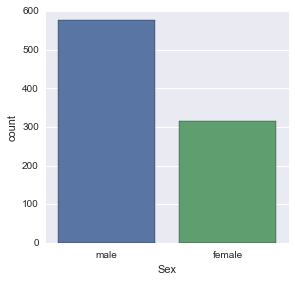

In [5]:
# Take a look at gender breakdown

sns.factorplot('Sex',data= titanic_df, kind = 'count')

Overall, there were more males than females

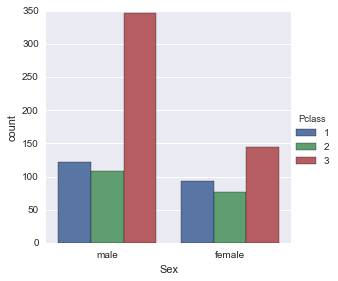

In [6]:
# Investigate further, is there a class difference in genders

sns.factorplot('Sex', data = titanic_df, kind = 'count', hue= 'Pclass')

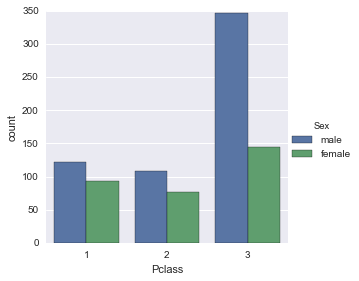

In [7]:
# Let's look at it in a different view

# It's easier to see the difference this way

sns.factorplot('Pclass', data = titanic_df, kind = 'count', hue= 'Sex')

This shows the breakdown of each class by sex.

As the data shows, in each class there were more males.

Is there a split between male, female, and children?

In [8]:
def male_female_child(passenger):
    age, sex = passenger
    
    # defined child as less than 16 years of age
    if age < 16:
        return 'child'
    else:
        return sex

In [9]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [10]:
# Checking to ensure the function applied correctly

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


The new "Person" column shows if the passanger was male, female or a child (under 16 years old).

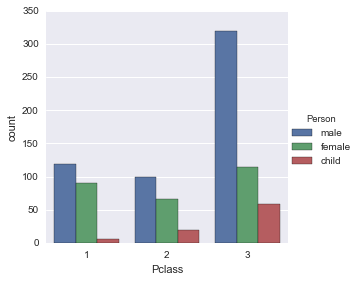

In [11]:
sns.factorplot('Pclass', data= titanic_df, hue = 'Person', kind= 'count')

This shows that there were more males than females in every class taking into consideration of children. It also shows that there were more children in 3rd class than any other class

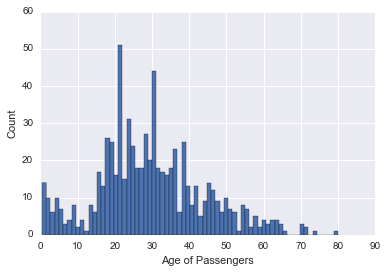

In [12]:
# Creating a distribution of ages to get a better idea of the passengers

titanic_df['Age'].hist(bins= 70)
plt.xlabel('Age of Passengers')
plt.ylabel('Count')

In [13]:
titanic_df['Age'].mean()

29.69911764705882

In [14]:
# Get an overall comparison of male, female, and child

titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

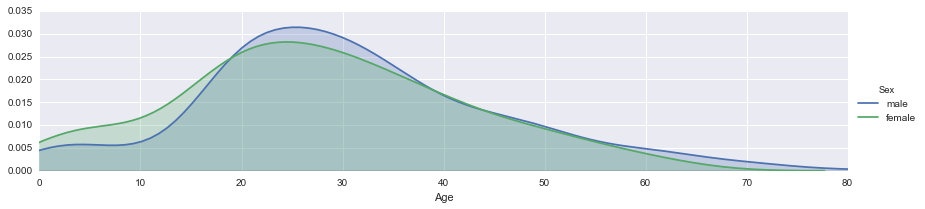

In [15]:
# Take a look at ages range by male, female

fig = sns.FacetGrid(titanic_df, hue= 'Sex', aspect= 4)
fig.map(sns.kdeplot, 'Age', shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0, oldest))

fig.add_legend()

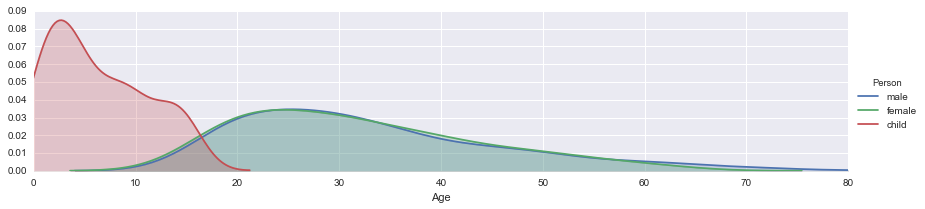

In [16]:
# Take a look at ages range by male, female, child

fig = sns.FacetGrid(titanic_df, hue= 'Person', aspect= 4)
fig.map(sns.kdeplot, 'Age', shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0, oldest))

fig.add_legend()

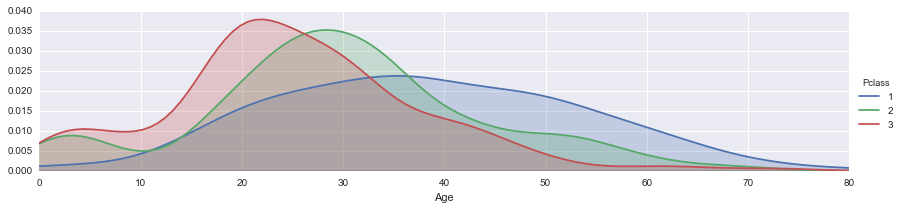

In [17]:
# Take a look at ages range by class

fig = sns.FacetGrid(titanic_df, hue= 'Pclass', aspect= 4)
fig.map(sns.kdeplot, 'Age', shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0, oldest))

fig.add_legend()

Now that there is a good idea of the passengers, moving on to answer the 2nd question. 

What deck were the passengers on and how does that relate to their class?

In [18]:
# Taking a quick refresher look at the dataset

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [19]:
deck = titanic_df['Cabin'].dropna()

In [20]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

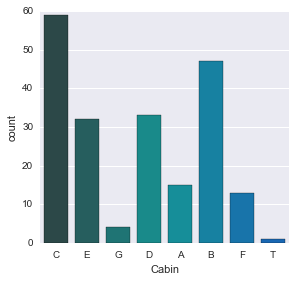

In [21]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data = cabin_df, palette = 'winter_d', kind= 'count')

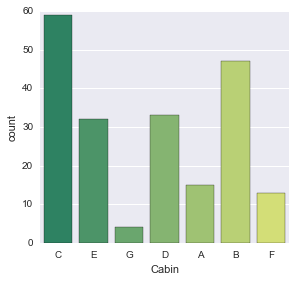

In [22]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin', data = cabin_df, palette = 'summer', kind= 'count')

This answers #2. Displaying the passenger breakdown by cabin.

In [23]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Embarkment: C= Cherbourg, Q = Queenstown, S = Southhampton

Now going to answer question #3, where did the people come from?

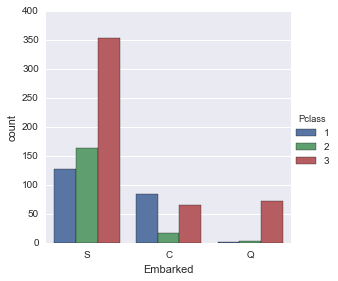

In [24]:
sns.factorplot('Embarked', data = titanic_df, hue='Pclass', kind = 'count')

Shows the breakdown of class by embarkment city.

Gives some insight into the economic class of each city.

Answering question #4, who was alone and who was with family?

In [30]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\CoreySSD\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


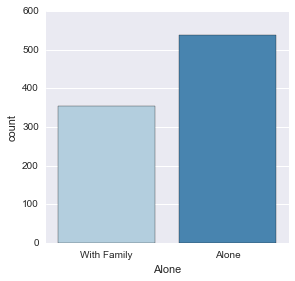

In [35]:
# Let's see overall the numbers of who was alone and with family

sns.factorplot('Alone', data = titanic_df, kind = 'count', palette = 'Blues')

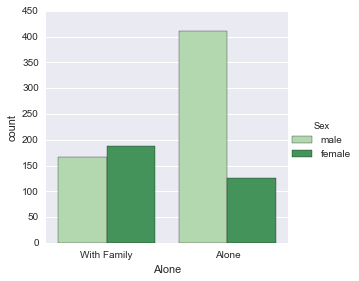

In [38]:
# Let's see how many females and males were alone

sns.factorplot('Alone', data = titanic_df, hue= 'Sex', kind = 'count', palette = 'Greens')

Answering #5, what factors helped someone survive the sinking of the Titanic?

In [44]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})

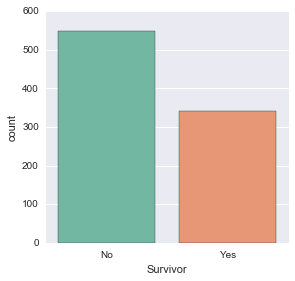

In [49]:
sns.factorplot('Survivor', data= titanic_df, kind='count', palette = 'Set2')

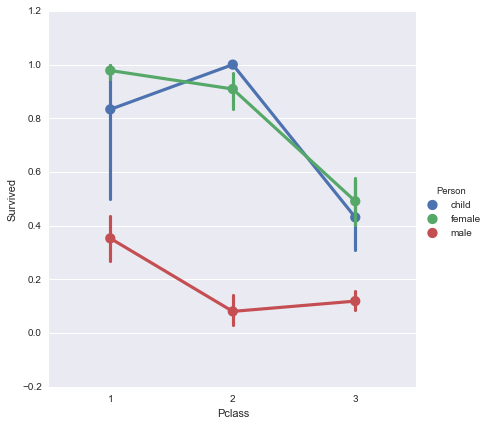

In [57]:
# Did class have a factor in survival rate?

sns.factorplot('Pclass','Survived',data = titanic_df.sort_values('Pclass'), hue= 'Person', size = 6)

Looks like being a male or in 3rd class does not have a positive outlook of survivor rate. Even more so, being a male in any class drastically decreased chances or surviving.

Does age have a factor in this?

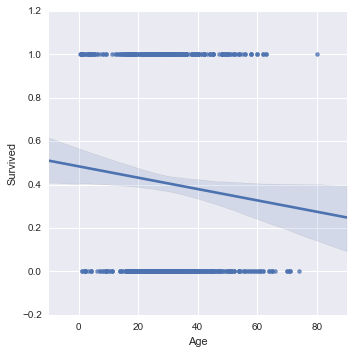

In [58]:
sns.lmplot('Age','Survived', data= titanic_df)

Remember, survived = 1 and died = 0

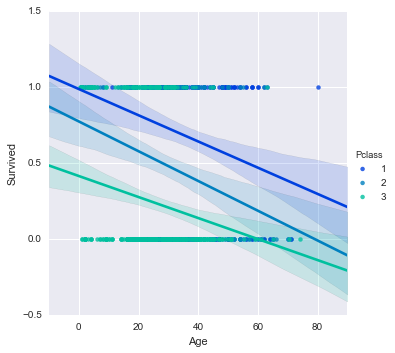

In [59]:
sns.lmplot('Age','Survived', hue= 'Pclass', data= titanic_df, palette= 'winter')

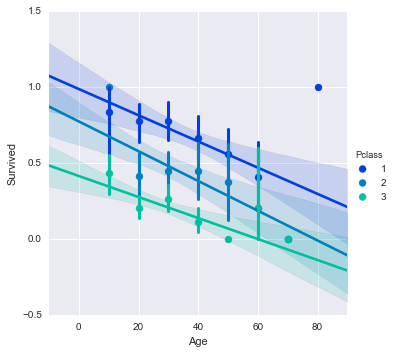

In [62]:
generations = [10,20,30,40,50,60,70,80]

sns.lmplot('Age','Survived',hue= 'Pclass', data= titanic_df, palette = 'winter', x_bins = generations)

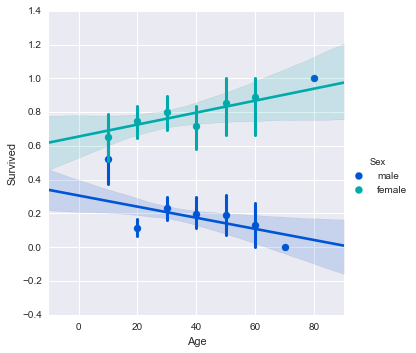

In [63]:
sns.lmplot('Age','Survived', hue= 'Sex', data= titanic_df, palette = 'winter', x_bins= generations)

In [65]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


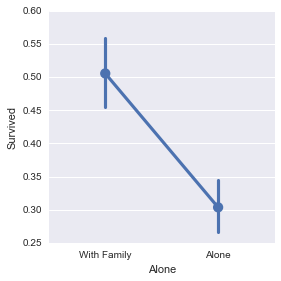

In [81]:
# Does having a family member increase the odds of surviving the crash?

sns.factorplot('Alone', 'Survived', data= titanic_df)

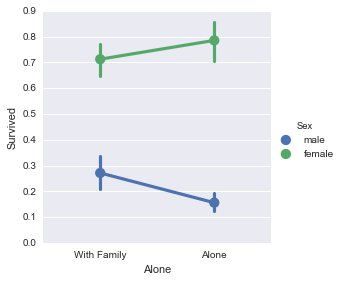

In [82]:
# How about was there a difference between sex and being alone or with somebody

sns.factorplot('Alone', 'Survived', hue= 'Sex', data= titanic_df)